In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from networks import DiffusionNetwork
from data import LatinHyperCubeSampling
from loss_function import DiffusionLoss
import os
import re

In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model = DiffusionNetwork(
    input_size=3,
    output_size=1,
    hidden_layers=8,
    hidden_units=30,
    hidden_units_grad2=20
).to(device)

In [5]:
model.a_x

Parameter containing:
tensor([1.0000e-06], device='cuda:0', requires_grad=True)

In [6]:
# 2️⃣ Load weights
checkpoint_path = "./checkpoints/adam_epoch_28000.pt"  # change to your file
model.load_state_dict(torch.load(checkpoint_path, map_location=device))

# 3️⃣ Set model to evaluation mode
model.eval()

print("✅ Model loaded successfully from:", checkpoint_path)

✅ Model loaded successfully from: ./checkpoints/adam_epoch_28000.pt


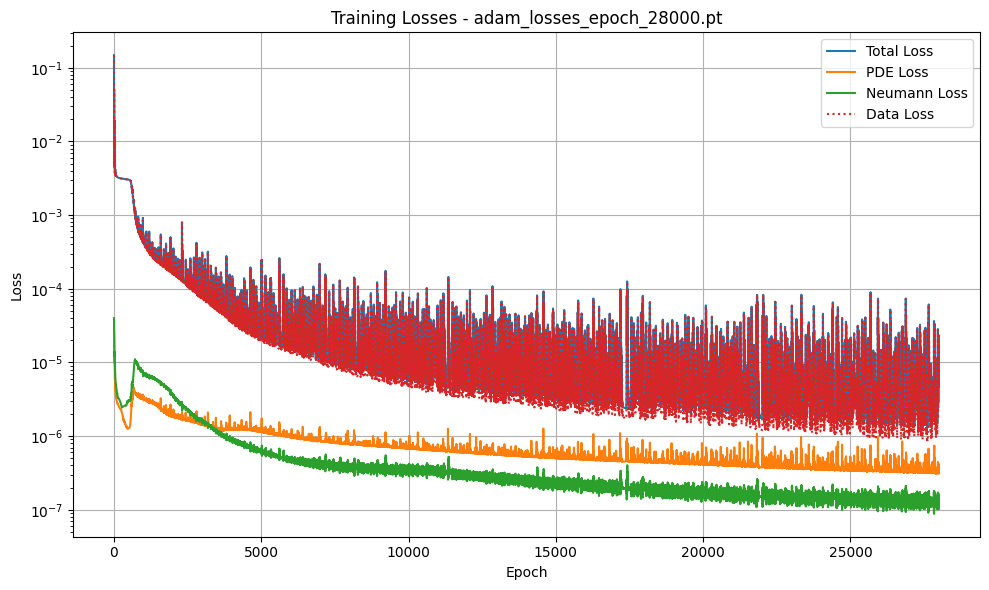

In [8]:
# --- Configure paths ---
log_dir = "logs"   # path to your logs folder
log_file = "adam_losses_epoch_28000.pt"  # choose one file to plot

# --- Load the log data ---
log_path = os.path.join(log_dir, log_file)
data = torch.load(log_path, map_location='cpu')

# --- Extract the losses ---
epochs = data['epochs']
pde_losses = data['pde_losses']
neumann_losses = data['neumann_losses']
data_losses = data['data_losses']
total_losses = data['total_losses']

# --- Plot ---
plt.figure(figsize=(10,6))
plt.plot(epochs, total_losses, label='Total Loss')
plt.plot(epochs, pde_losses, label='PDE Loss')
plt.plot(epochs, neumann_losses, label='Neumann Loss')
plt.plot(epochs, data_losses, label='Data Loss',linestyle=':')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Training Losses - {log_file}")
plt.yscale('log')  # optional: useful if losses span wide range
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
model.a_z

Parameter containing:
tensor([0.1142], device='cuda:0', requires_grad=True)